# Roll for stats

*Player's Handbook* for DnD 5e describes a method of determining your character's ability scores (p. 13):
> You generate your character's six ability scores
randomly. Roll four 6-sided dice and record the total of
the highest three dice on a piece of scratch paper. Do
this five more times, so that you have six numbers.

Let's find out the distribution for this roll. Since I couldn't come up with an analytic solution, I'm going to brute-force through all possible combinations of 4 rolls of 6-sided dice.

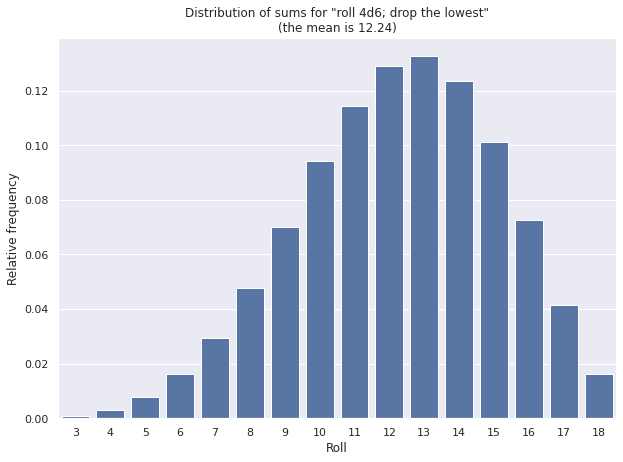

In [1]:
from itertools import product

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


sns.set()

sums = [sum(sorted(roll)[1:]) for roll in product(range(1, 7), repeat=4)]
values, counts = np.unique(sums, return_counts=True)
freqs = counts / sum(counts)

plt.figure(figsize=(10, 7))
sns.barplot(x=values, y=freqs, color='b')
plt.xlabel('Roll')
plt.ylabel('Relative frequency')
plt.title(f'Distribution of sums for "roll 4d6; drop the lowest"\n'
          f'(the mean is {values.dot(freqs):.2f})'
)
plt.show()

And there you go: the most likely roll is 13, the most unlikely is 3 (you have to roll all ones).

Let's also calculate the probability of rolling 18 at least once.

In [2]:
p_18 = freqs[-1]
print(f'Probability of rolling 18 at least once: {1 - (1 - p_18)**6:.3f}')

Probability of rolling 18 at least once: 0.093


Using Point buy (an alternative system of assigning ability scores) 15 is the highest score you can get. Let's calculate the probability of rolling higher than 15 at least once.

In [3]:
p_16_18 = sum(freqs[-3:])
print(f'Probability of rolling a number from 16 to 18 at least once: {1 - (1 - p_16_18)**6:.3f}')

Probability of rolling a number from 16 to 18 at least once: 0.568
